In [1]:
%%html
<style>
.cell.selected~.unselected { display: none; }
.cell.code_cell.unselected .input { display: none; }
</style>

## Bar chart


In [2]:
%load_ext autoreload
%autoreload
%run ./prepare_data.ipynb
%run ./analysis.ipynb
import matplotlib.pyplot as plt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
   Current URL     Guess  votes
0        URL10   Player4      4
1        URL10   Player6      3
2        URL10   Player3      2
3        URL11   Player1      2
4        URL11   Player9      2
5         URL6   Player6      2
6        URL10   Player1      1
7        URL10   Player2      1
8        URL11  Player10      1
9        URL11  Player11      1
10       URL11   Player2      1
11       URL11   Player3      1
12       URL11   Player5      1
13       URL11   Player7      1
14       URL11   Player8      1
15        URL6   Player3      1
     URL   Player     Guess
0  URL11  Player8  Player11
1   URL6  Player9   Player6
2   URL6  Player1   Player6
      Player  Guess
0    Player1    1.0
1    Player2    0.0
2    Player3    0.0
3    Player4    0.0
4    Player5    0.0
5    Player6    0.0
6    Player7    0.0
7    Player8    1.0
8    Player9    1.0
9   Player10    0.0
10  Player11    0.0
      Player  Gu

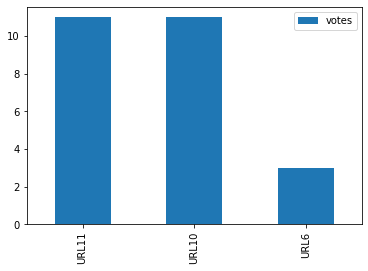

In [3]:
votes_links.plot.bar(y='votes'); # plot histogram


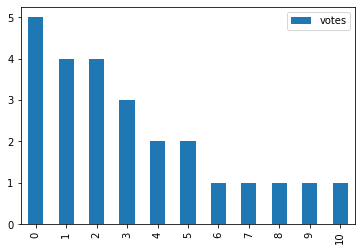

In [4]:
total_votes.plot.bar(y='votes'); # plot histogram
#plt.savefig('data/total_votes.pdf', bbox_inches='tight')

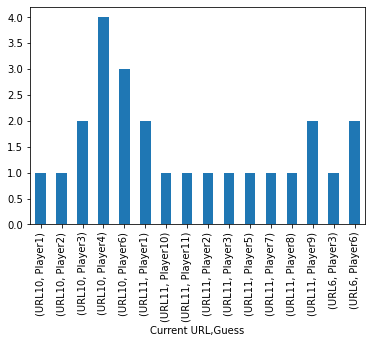

In [5]:
if len(df_raw) < 30:
    guess_stats.plot.bar(x='Current URL'); # plot histogram


   Current URL     Guess  votes
3        URL11   Player1      2
4        URL11   Player9      2
8        URL11  Player10      1
9        URL11  Player11      1
10       URL11   Player2      1
11       URL11   Player3      1
12       URL11   Player5      1
13       URL11   Player7      1
14       URL11   Player8      1
Player11
  Current URL    Guess  votes
0       URL10  Player4      4
1       URL10  Player6      3
2       URL10  Player3      2
6       URL10  Player1      1
7       URL10  Player2      1
Player10
   Current URL    Guess  votes
5         URL6  Player6      2
15        URL6  Player3      1
Player6


FileNotFoundError: [Errno 2] No such file or directory: '../data/charts/bar-chart.pdf'

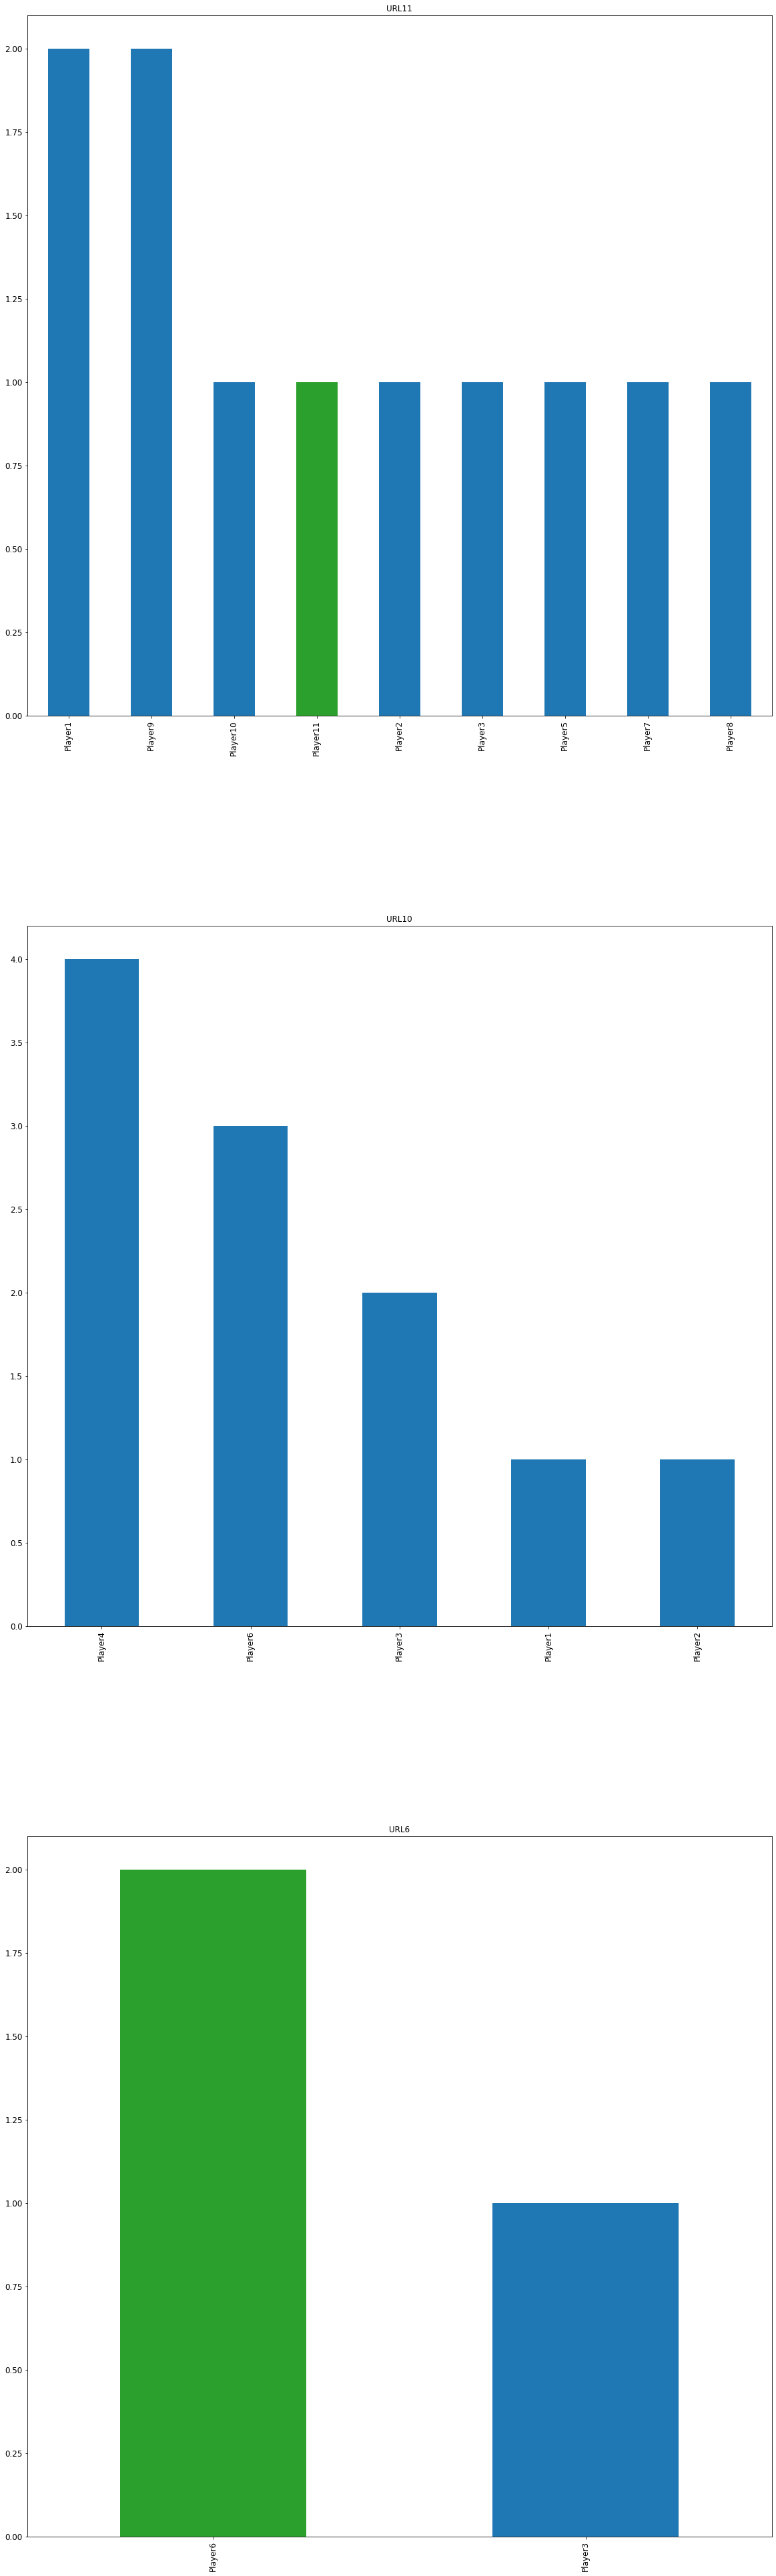

In [6]:
# bar chart per URL, the correct answer is colored in green, the rest of the guesses are blue

fig, axes = plt.subplots(len(urls),1,figsize=(20, 60))
plt.subplots_adjust(wspace=0.3, hspace=0.3, top=1)
for i,ax in enumerate(axes):
    url = urls[i]
    temp_df = df_guess.loc[df_guess['Current URL'] == url]
    print(temp_df)
    labels = temp_df['Guess']
    cor_ans = df2_raw[df2_raw['URL'] == url]['Player'].values[0]
    print(cor_ans)
    ind=labels.isin([cor_ans])
    color=list(map(lambda x: 'C2' if x else 'C0', ind))
    #color=list(map(lambda x: 'C0' if x else 'C0', ind))
    width = len(ind) * [0.2]
    temp_df.loc[:,['Guess','votes']].plot.bar(ax=ax,subplots=True, x='Guess',y='votes',color=color, fontsize=12);
    ax.get_legend().remove()
    ax.set_title(url,fontdict={'fontsize':12})
    ax.set(xlabel=None)

plt.savefig('../data/charts/bar-chart.pdf', bbox_inches='tight')
#plt.show()




## Pie chart

In [ ]:
# combined pie chart, only for small dataframes
if len(df_raw) < 30:
    guess_stats.plot.pie(subplots=True,y='votes',figsize=(6, 6),autopct='%1.1f%%',shadow = True);



In [ ]:
# pie chart per URL, the correct answers are "exploded"

fig, axes = plt.subplots(len(urls),1,figsize=(30, 20))
for i,ax in enumerate(axes):
    url = urls[i]
    temp_df = df_guess.loc[df_guess['Current URL'] == url]
    labels = temp_df['Guess']
    cor_ans = df2_raw[df2_raw['URL'] == url]['Player'].values[0]
    ind=labels.isin([cor_ans])
    #explode=list(map(int, ind))
    explode=list(map(lambda x: 0.2 if x else 0, ind)) #only explode correct guess
    temp_df.loc[:,['Guess','votes']].plot.pie(ax=ax,subplots=True,labels = labels, y='votes', autopct='%1.1f%%',shadow = True,explode=explode);
    ax.get_legend().remove()
    ax.set_title(url)
plt.show()

In [ ]:
corr_player_stats.sort_values('Guess')
fig = corr_player_stats.plot.bar(y='Guess',x='Player').get_figure()
fig.savefig('../data/charts/correct_guess_stats.png', bbox_inches='tight')

In [ ]:
corr_guess_stats.sort_values('Guess')
fig = corr_guess_stats.plot.bar(y='Guess',x='Player').get_figure()
fig.savefig('../data/charts/correct_player_stats.png', bbox_inches='tight')

In [ ]:
# total votes for player
#total_votes.sort_values
fig = total_votes.plot.bar(y='votes',x='Player').get_figure()
fig.savefig('../data/charts/guessed_player_stats.png', bbox_inches='tight')

In [ ]:
# wrongs votes for player
fig = wrong_votes.plot.bar(y='votes',x='Player').get_figure()
fig.savefig('../data/charts/wrong_guesses_stats.png', bbox_inches='tight')



